<a href="https://colab.research.google.com/github/nickt573/Google-Colab-Research/blob/main/pneumonia_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
!pip install matplotlib torch torchvision kagglehub

# Managing Data

In [2]:
import os
import kagglehub
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),           # Safe for X-rays
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = datasets.ImageFolder(os.path.join(path, "chest_xray/train"), train_transform)
val_dataset = datasets.ImageFolder(os.path.join(path, "chest_xray/test"), val_transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


# Building model

Reset all parameters

In [3]:
import torch
from pneumonia import Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

history = {}
history["train_acc"] = []
history["val_acc"] = []
model = Model().to(device)
print(device)

ModuleNotFoundError: No module named 'pneumonia'

# Running model

In [ ]:
epoch = 10
for i in range(epoch):
    print(f"Epoch {i + 1}/{epoch}")
    acc = model.train_model(train_loader)
    history["train_acc"].append(acc)
    acc = model.test_model(val_loader, False)
    history["val_acc"].append(acc)

Epoch 1/35
Train loss: 0.2516943129097543
Train accuracy: 0.7551763803680982

Test loss: 0.4269675314426422
Test accuracy: 69.87179487179486%

Epoch 2/35
Train loss: 0.177591076711329
Train accuracy: 0.85295245398773

Test loss: 0.26479963064193723
Test accuracy: 86.37820512820514%

Epoch 3/35
Train loss: 0.13809060359873424
Train accuracy: 0.8939800613496932

Test loss: 0.21278817653656007
Test accuracy: 88.9423076923077%

Epoch 4/35
Train loss: 0.12612041231335663
Train accuracy: 0.9052914110429447

Test loss: 0.2799627974629402
Test accuracy: 85.8974358974359%

Epoch 5/35
Train loss: 0.11453790417531641
Train accuracy: 0.9118098159509203

Test loss: 0.3543395608663559
Test accuracy: 84.4551282051282%

Epoch 6/35
Train loss: 0.1100865240867545
Train accuracy: 0.9204371165644172

Test loss: 0.3305658832192421
Test accuracy: 85.09615384615384%

Epoch 7/35
Train loss: 0.11134654928634806
Train accuracy: 0.9158358895705522

Test loss: 0.24514345228672027
Test accuracy: 86.53846153846155%

KeyboardInterrupt: 

# Visualizing model

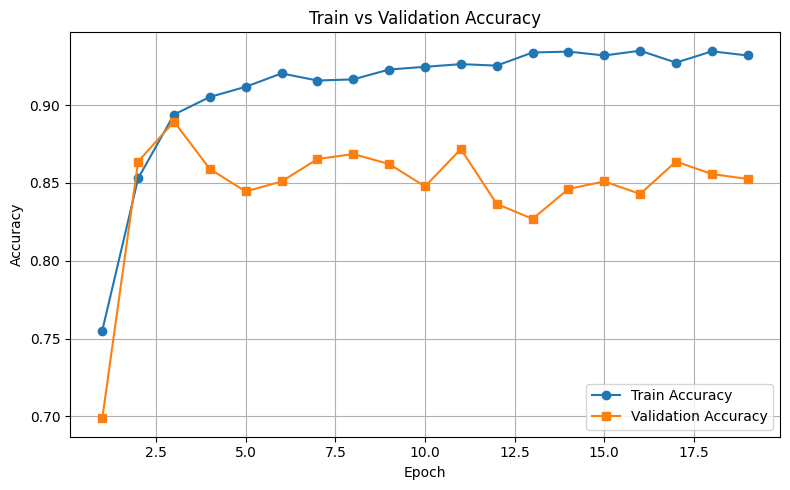

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history["train_acc"]) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history["train_acc"], label='Train Accuracy', marker='o')
plt.plot(epochs, history["val_acc"], label='Validation Accuracy', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


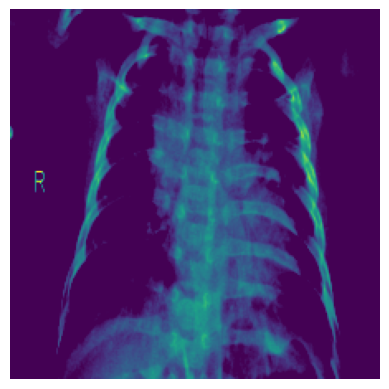

Prediction: pneumonia
Actual: pneumonia



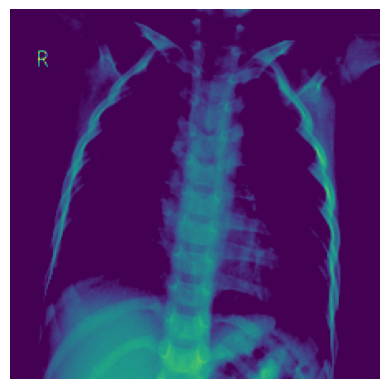

Prediction: No pneumonia
Actual: No pneumonia



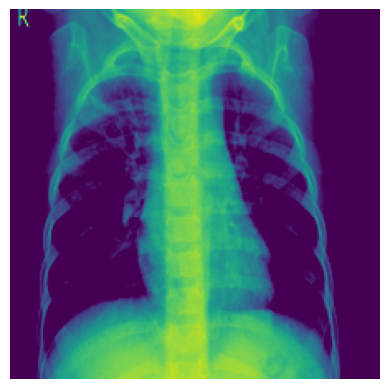

Prediction: pneumonia
Actual: pneumonia



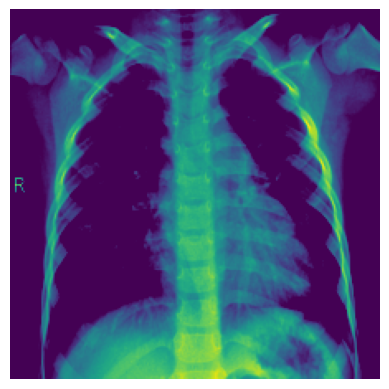

Prediction: No pneumonia
Actual: No pneumonia



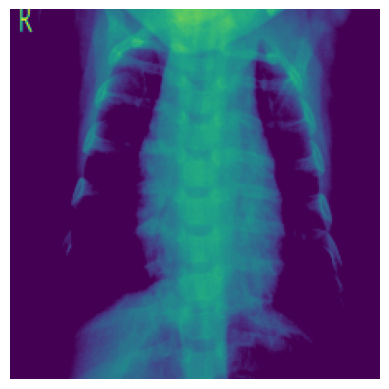

Prediction: pneumonia
Actual: pneumonia



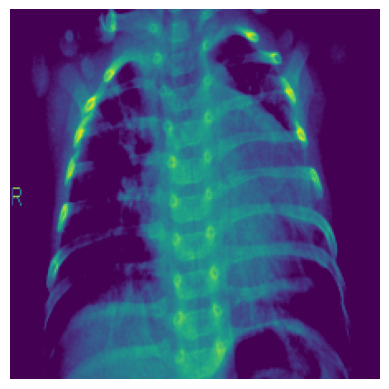

Prediction: pneumonia
Actual: pneumonia



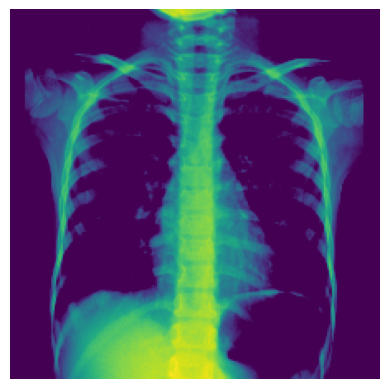

Prediction: No pneumonia
Actual: No pneumonia



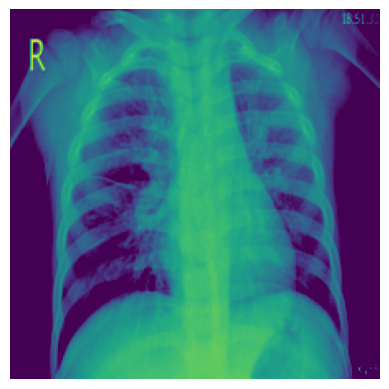

Prediction: pneumonia
Actual: pneumonia



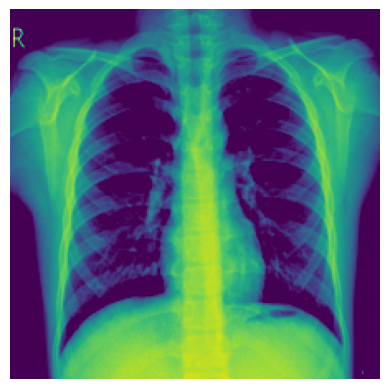

Prediction: No pneumonia
Actual: No pneumonia



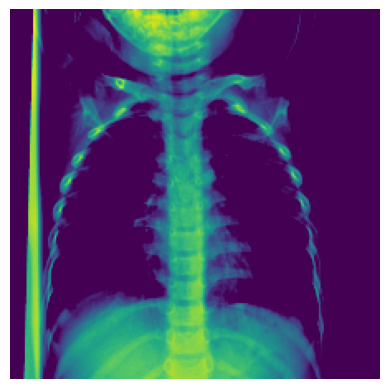

Prediction: No pneumonia
Actual: No pneumonia

Test accuracy: 85.57692307692307%



In [ ]:
_ = model.test_model(val_loader, True)